# Esercitazione 2

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Esercizio 1

Calcolo dell'integrale $\int_0^1\frac{\pi}{2}\cos\frac{\pi x}{2}\,\mathrm{d}x$ con tecniche Monte Carlo.

In entrambi i casi la stima dell'integrale è stata ottenuta utilizzando $N=500$ blocchi, ciascuno di lunghezza $L=10^3$

### Punto 1 - Campionamento Uniforme

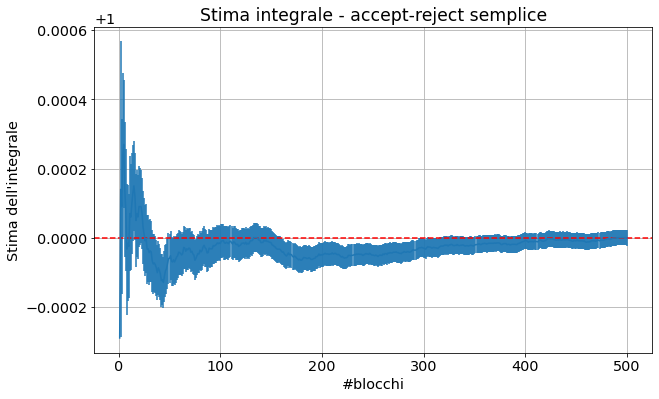

In [2]:
media, sigma_media = np.loadtxt("Media.dat", usecols=(1,2), delimiter=' ', unpack='true')
x = np.arange(len(media))+1
plt.errorbar(x, media, yerr=sigma_media)
plt.axhline(1.0, color = 'red', linestyle = 'dashed')
plt.xlabel('#blocchi')
plt.ylabel("Stima dell'integrale")
plt.title("Stima integrale - accept-reject semplice")
plt.grid(True)
plt.show()

### Punto 2  - Importance Sampling

Quando si utilizza il metodo di integrazione dell'*importance sampling* si parte da un integrale scritto nella forma seguente:
$$ I = \int_\Omega g(x)p(x)dx $$ 
dove $p(x)$ è una densita di probabilità su $\Omega$. Si introduce quindi una distribuzione di probabilità $d(x)$ che consente di riscrivere l'integrale precedente come $$ I = \int_\Omega \frac{g(x)p(x)}{d(x)}d(x) dx$$.
In questo modo, se la soluzione del problema fosse nota si potrebbe utilizzare $d(x)=\frac{g(x)p(x)}{I}$ e la quantità $$ G_N = \frac{1}{N}\sum_{i=0}^N \frac{g(x)p(x)}{d(x)} = I $$ coinciderebbe, come mostrato, con l'integrale di partenza.
Se anche $d$ non è esattamente l'integranda $G_N$ resta un buono stimatore dell'integrale. 

La scelta della funzione di campionamrnto è particolarmente delicata perchè serve una funzione che approssimi sufficientemente bene l'integranda ma anche abbastanza semplice perchè se ne possa trovare la cumulativa e che questa possa essere invertita.

Sicuramente la funzione più semplice con cui approssimare l'integranda in questo caso è la retta $$g(x) = -\frac{\pi}{2}x +\frac{\pi}{2}$$

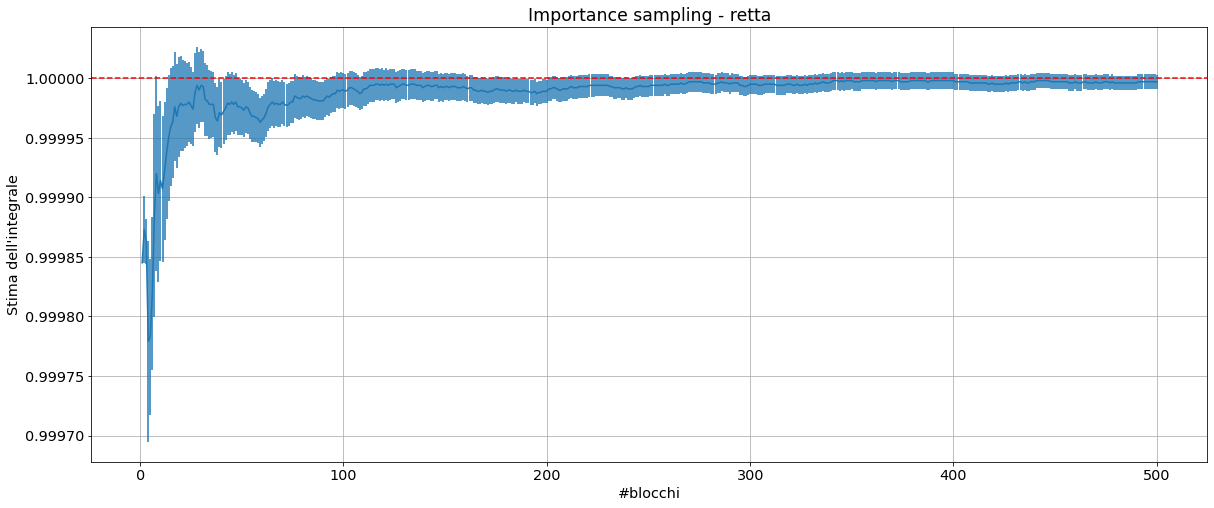

In [3]:
media, sigma_media = np.loadtxt("ImpSampling.dat", usecols=(1,2), delimiter=' ', unpack='true')
fig = plt.figure(figsize =(20, 8))

x = np.arange(len(media))+1
plt.errorbar(x, media, yerr=sigma_media)
plt.axhline(1.0, color = 'red', linestyle = 'dashed')
plt.xlabel('#blocchi')
plt.ylabel("Stima dell'integrale")
plt.title("Importance sampling - retta")
plt.grid(True)
plt.show()

Dal grafico si osserva che la stima dell'integrale, nonostante sia più precisa risulta non compatibile con il valore vero. Questo è probabilmente da imputare al fatto che la funzione $g(x)$ non approssima abbastanza bene l'integranda.

### Confronto tra i due metodi

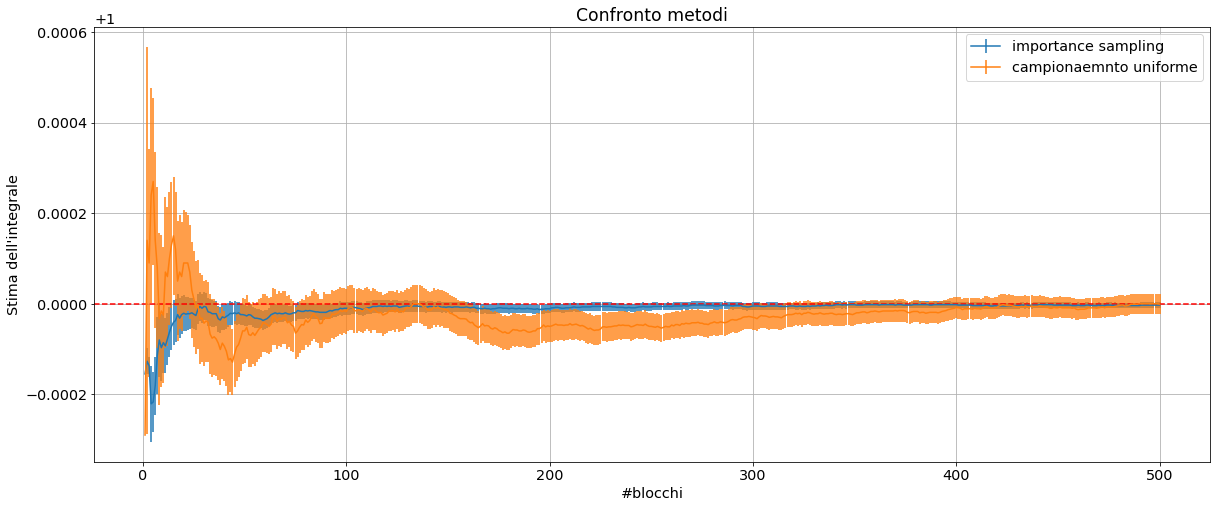

In [4]:
mediaI, sigma_mediaI = np.loadtxt("ImpSampling.dat", usecols=(1,2), delimiter=' ', unpack='true')
media, sigma_media = np.loadtxt("Media.dat", usecols=(1,2), delimiter=' ', unpack='true')
fig = plt.figure(figsize =(20, 8))

x = np.arange(len(media))+1
plt.errorbar(x, mediaI, yerr=sigma_mediaI)
plt.errorbar(x, media, yerr=sigma_media)
plt.xlabel('#blocchi')
plt.ylabel("Stima dell'integrale")
plt.title("Confronto metodi")
plt.legend(["importance sampling","campionaemnto uniforme"])
plt.axhline(1.0, color = 'red', linestyle = 'dashed')
plt.grid(True)
plt.show()

Dal grafico si osserva che entrambi i metodi convergono al valore dell'integrale, tuttavia il metodo dell'importance sampling risulta essere più preciso e tende molto più velocemente al valore esatto.

## Esercizio 2

L'obiettivo di questo secondo esercizio è quello di verificare alcune proprietà dei *random walks* (di seguito abbreviati $RW$), in particolare si considerano random walk tridimensionali, discreto il primo e continuo il secondo.

### Punnto 1 - Random Walk 3D su reticolo

In questo caso l'algoritmo prevede che il *walker* possa muoversi su un reticolo tridimensionale.
Sono stati eseguiti $M=10^5 RW$ ciascuno di $10^2$ passi, che sono poi stai suddivisi in $N=100$  blocchi.
Per ciascun blocco è stata calcolata, come funzione del passo, la media delle distanze percorse dal walker $\sqrt{\langle |\vec{r}_k(i)|^2 \rangle_j}$ con $k \in {0,...,\frac{M}{N}}, j \in {0,...,N}, i \in {0,...,P}$.
Nel grafico di seguito le $N$ stime sono riportate come funzione dello step $i$.

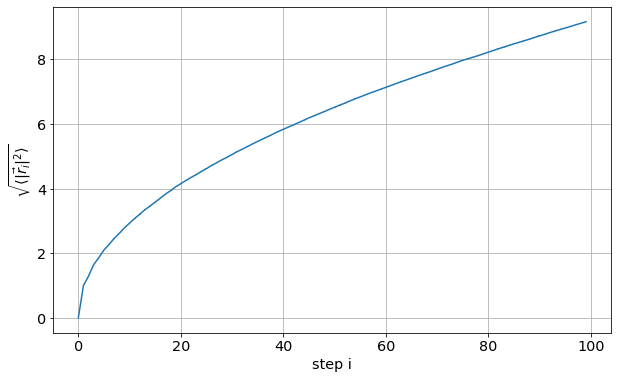

In [5]:
media, sigma = np.loadtxt("RWZ3.dat", usecols=(1,2), delimiter=' ', unpack='true')
x = np.arange(len(media))
griglia = media
plt.errorbar(x,media,yerr=sigma)
plt.xlabel("step i")
plt.ylabel(r'$\sqrt{\langle |\vec{r}_i|^2 \rangle}$')
plt.grid(True)
plt.show()

Si osserva che il $RW$ tende a diffondersi nello spazio (la sua distanza dall'origine aumenta con il passare del tempo).

### Punto 2 - Random Wlak 3D continuo

In questo caso, il *walker* si muove nel continuo, dal punto di vista dell'algoritmo questo significa che ad ogni step il *walker* si può spostare su un punto qualunque di una sfera centrata sulla sua posizione.

Nel grafico sottostante sono state nuovamente riportate le $N$ stime della distanza percorsa dal *walker* in funzione dello step *i*.
I valori dei diversi parametri sono gli stessi dell'esercizio precedente.

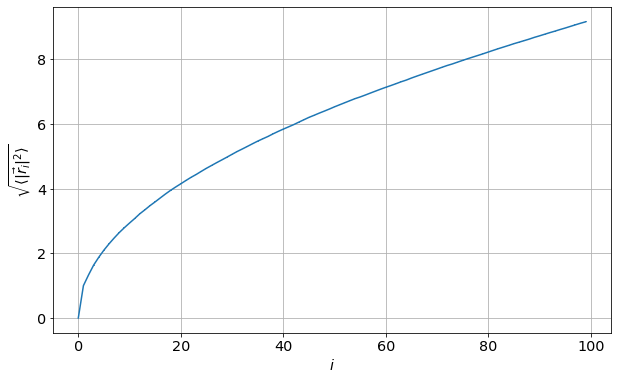

In [6]:
media, sigma = np.loadtxt("RWR3.dat", usecols=(1,2), delimiter=' ', unpack='true')
x = np.arange(len(media))
spazio = media
plt.errorbar(x,media,yerr=sigma)
plt.xlabel(r'$i$')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_i|^2 \rangle}$')
plt.grid(True)
plt.show()